In [1]:
from postprocessing import compute_average_ROC_curve, compute_average_PR_curve, load_predictions, get_training_data
import pandas as pd
import os
import numpy as np

In [7]:
model_dir = "/home/samuele/trainend_models/emogi/2022_06_13_13_35_08_065938"
#model_dir = "/home/samuele/trainend_models/emogi/2022_05_20_18_30_47_129678"
training_data = get_training_data(model_dir)

training_dir /home/samuele/trainend_models/emogi/2022_06_13_13_35_08_065938
data_file ../../../EMOGI/artivir_data/data_preprocessing_pipeline/transcriptomics_proteomics_extended_positives_signed_values_weighted_connections_missing_values_2022_6_9_13_57.h5


In [8]:
network, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, node_names, feat_names = training_data

In [9]:
len(y_train)

13408

In [11]:
np.sum(y_train + y_val + y_test)

380.0

In [10]:
np.sum(network != 0)

1061050

In [196]:
df_predictions_cv0 = pd.read_csv(os.path.join(model_dir, 'cv_0', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv1 = pd.read_csv(os.path.join(model_dir, 'cv_1', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv2 = pd.read_csv(os.path.join(model_dir, 'cv_2', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv3 = pd.read_csv(os.path.join(model_dir, 'cv_3', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv4 = pd.read_csv(os.path.join(model_dir, 'cv_4', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv5 = pd.read_csv(os.path.join(model_dir, 'cv_5', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv6 = pd.read_csv(os.path.join(model_dir, 'cv_6', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv7 = pd.read_csv(os.path.join(model_dir, 'cv_7', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv8 = pd.read_csv(os.path.join(model_dir, 'cv_8', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv9 = pd.read_csv(os.path.join(model_dir, 'cv_9', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)

In [197]:
sum(df_predictions_cv0["Name"] == df_predictions_cv1["Name"])

13408

In [198]:
sum(df_predictions_cv2["Name"] == df_predictions_cv1["Name"])

13408

In [199]:
sum(df_predictions_cv2["Name"] == df_predictions_cv3["Name"])

13408

In [200]:
sum(df_predictions_cv3["Name"] == df_predictions_cv4["Name"])

13408

In [201]:
df_predictions_average = pd.DataFrame({"Name" : df_predictions_cv0["Name"]})

In [211]:
# Let's average all the probabilities of positive calssifications for each gene after 5 or 10 cross validation runs 
df_predictions_average["avg_positive_prob"] = (df_predictions_cv0["Prob_pos"] + df_predictions_cv1["Prob_pos"] + df_predictions_cv2["Prob_pos"] + df_predictions_cv3["Prob_pos"] + df_predictions_cv4["Prob_pos"] + df_predictions_cv5["Prob_pos"] + df_predictions_cv6["Prob_pos"] + df_predictions_cv7["Prob_pos"] + df_predictions_cv8["Prob_pos"] + df_predictions_cv9["Prob_pos"])/10
#df_predictions_average["avg_positive_prob"] = (df_predictions_cv0["Prob_pos"] + df_predictions_cv1["Prob_pos"] + df_predictions_cv2["Prob_pos"] + df_predictions_cv3["Prob_pos"] + df_predictions_cv4["Prob_pos"])/5

In [212]:
df_predictions_average.head(20)

,Name,avg_positive_prob
ID,,
GIT2,GIT2,0.600
OLFML2A,OLFML2A,0.492
UBA6-AS1,UBA6-AS1,0.433
OSBPL3,OSBPL3,0.587
MON1B,MON1B,0.567
TM2D1,TM2D1,0.510
AP001318.2,AP001318.2,0.400
MFSD10,MFSD10,0.501
ECHDC2,ECHDC2,0.635


In [213]:
gene_to_check = "FBXO4"
(df_predictions_cv0[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv1[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv2[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv3[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv4[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv5[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv6[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv7[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv8[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv9[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"])/10
#(df_predictions_cv0[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv1[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv2[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv3[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"] + df_predictions_cv4[df_predictions_cv0["Name"] == gene_to_check]["Prob_pos"])/5

ID
FBXO4   0.519
Name: Prob_pos, dtype: float64

In [214]:
df_predictions_average_sorted = df_predictions_average.sort_values(by=['avg_positive_prob'], ascending=False)

In [215]:
df_predictions_average_sorted.head(20)

,Name,avg_positive_prob
ID,,
JRKL,JRKL,0.978
TMEM107,TMEM107,0.944
CEACAM6,CEACAM6,0.905
OSCP1,OSCP1,0.899
VIRMA,VIRMA,0.899
IQCC,IQCC,0.895
TMEM106B,TMEM106B,0.882
LRRK2,LRRK2,0.882
PLEKHA4,PLEKHA4,0.880


In [108]:
#df_predictions_average_sorted.to_csv("df_predictions_average_sorted.csv", index=False)

In [109]:
#first_100_scoring = df_predictions_average_sorted['Name'].values[:100] 
#first_100_scoring

array(['SERPINE1', 'SERPINE2', 'PIGU', 'PIGK', 'PIGT', 'GPAA1', 'PIGS',
       'IFNGR1', 'CD63', 'RNF149', 'TNFRSF10B', 'ADAM10', 'YIPF6',
       'GOLGA7', 'NPC1', 'CAMLG', 'PTGFRN', 'TSPAN3', 'DNASE1L1',
       'COMMD10', 'B4GALT7', 'YIPF4', 'SERPINB6', 'TM9SF3', 'PXMP2',
       'COMMD3', 'COMMD8', 'SPCS1', 'COMMD2', 'ATG4B', 'RAB27B', 'FLVCR1',
       'TMEM106C', 'LAMP1', 'COMMD9', 'ITGB1', 'SPCS2', 'CASP8',
       'SLC29A1', 'SLC12A4', 'NDFIP1', 'COMMD5', 'ERGIC2', 'ADGRG1',
       'FASTKD5', 'SNX17', 'COMMD7', 'SLC29A2', 'ITGA3', 'LSR', 'ALCAM',
       'TRADD', 'SEC11C', 'CANX', 'SLC4A7', 'TM9SF2', 'ERGIC3', 'FAM241A',
       'FN1', 'COG1', 'ATP13A3', 'TMEM167A', 'SLC39A14', 'SLC30A1',
       'YIPF5', 'ABCC4', 'RDH14', 'SLC39A10', 'ITM2C', 'LPGAT1',
       'SLC12A6', 'KDELR2', 'CCDC93', 'TMEM106B', 'MAN1A2', 'ARAP1',
       'ITGA2', 'TFRC', 'NQO2', 'TSPAN14', 'MRC2', 'ADAM17', 'ZFPL1',
       'DGAT1', 'RNF13', 'HMOX2', 'RNF170', 'SOAT1', 'IGSF3', 'KIDINS220',
       'CD151', 'TMEM2

In [216]:
first_100_scoring = df_predictions_average_sorted['Name'].values[:100] 

In [217]:
# host factors from publications

host_factors = pd.ExcelFile("/home/samuele/EMOGI/artivir_data/host_factors_from_publications.xlsx")

host_factors_dfs = {sheet_name: host_factors.parse(sheet_name) for sheet_name in host_factors.sheet_names}

In [219]:
host_factors_df = host_factors_dfs['host_factors']
host_factors_df.head()

,Reference,Assay type,Assay cell line,Method,Bait,Gene name,Uniprot accession,Functionally validated by authors
0,Gordon et al.,Protein interactome,HEK293T,AP-MS,M,AAR2,Q9Y312,NaN
1,Li et al.,Protein interactome,HEK293T,AP-MS,nsp10,AARS1,P49588,NaN
2,Li et al.,Protein interactome,HEK293T,AP-MS,nsp10,AASDHPPT,Q9NRN7,NaN
3,Gordon et al.,Protein interactome,HEK293T,AP-MS,M,AASS,Q9UDR5,NaN
4,Gordon et al.,Protein interactome,HEK293T,AP-MS,nsp8,AATF,Q9NY61,NaN


In [220]:
y_labels = y_train + y_val + y_test
sum(y_labels)

array([380.])

In [221]:
positive_training_genes = df_predictions_average[y_labels == 1]

In [222]:
import numpy as np
np.mean(positive_training_genes["avg_positive_prob"].values)

0.6145927999835266

In [223]:
positive_training_genes = positive_training_genes["Name"].values

In [224]:
# How many of the top 100 scoring genes are part of the training set?
counter = 0
gene_list_training = []
for gene in first_100_scoring:
    if gene in positive_training_genes:
        counter += 1
        gene_list_training.append(gene)
        
print(f"How many of the top 100 scoring genes are part of the training set? {counter}")        

How many of the top 100 scoring genes are part of the training set? 12


In [225]:
potential_host_factors = host_factors_df["Gene name"].unique()

In [226]:
# How many of the top 100 scoring genes have been detected in Baggen et al.?
counter = 0
gene_list_baggen = []
for gene in first_100_scoring:
    if gene in potential_host_factors:
        counter += 1
        gene_list_baggen.append(gene)
        
print(f"How many of the top 100 scoring genes have been detected in Baggen et al.? {counter}") 

How many of the top 100 scoring genes have been detected in Baggen et al.? 53


In [227]:
# Genes from the top 100 that are part of baggen et al
df_predictions_average_sorted[df_predictions_average_sorted["Name"].isin(gene_list_baggen)].head(20)

,Name,avg_positive_prob
ID,,
TMEM106B,TMEM106B,0.882
TMEM231,TMEM231,0.874
PIGK,PIGK,0.872
PIGU,PIGU,0.871
PPT1,PPT1,0.868
TNFRSF10B,TNFRSF10B,0.858
MCOLN3,MCOLN3,0.854
RNF4,RNF4,0.850
GAL3ST1,GAL3ST1,0.847


In [228]:
# Genes from the top 100 that are part of the training set
df_predictions_average_sorted[df_predictions_average_sorted["Name"].isin(gene_list_training)]

,Name,avg_positive_prob
ID,,
TMEM106B,TMEM106B,0.882
PIGU,PIGU,0.871
TNFRSF10B,TNFRSF10B,0.858
GPAA1,GPAA1,0.830
PIGT,PIGT,0.824
PIGS,PIGS,0.815
RNF149,RNF149,0.790
AGPAT3,AGPAT3,0.779
ATP5PB,ATP5PB,0.771


In [229]:
y_labels = [int(label) for label in y_labels]
sum(y_labels)

380

In [230]:
masks = train_mask + val_mask + test_mask
masks = [int(mask) for mask in masks]

In [231]:
sum(masks)

1520

In [232]:
negative_set = [mask^y_label for mask, y_label in zip(masks, y_labels)] 

In [233]:
sum(negative_set) == sum(y_labels)*3

True

In [234]:
df_predictions_average["training_set_positives"] = y_labels
df_predictions_average.head()

,Name,avg_positive_prob,training_set_positives
ID,,,
GIT2,GIT2,0.600,0
OLFML2A,OLFML2A,0.492,0
UBA6-AS1,UBA6-AS1,0.433,0
OSBPL3,OSBPL3,0.587,0
MON1B,MON1B,0.567,0


In [235]:
df_predictions_average["training_set_negatives"] = negative_set
df_predictions_average.head()

,Name,avg_positive_prob,training_set_positives,training_set_negatives
ID,,,,
GIT2,GIT2,0.600,0,0
OLFML2A,OLFML2A,0.492,0,0
UBA6-AS1,UBA6-AS1,0.433,0,0
OSBPL3,OSBPL3,0.587,0,0
MON1B,MON1B,0.567,0,0


In [236]:
host_factors_df.head()

,Reference,Assay type,Assay cell line,Method,Bait,Gene name,Uniprot accession,Functionally validated by authors
0,Gordon et al.,Protein interactome,HEK293T,AP-MS,M,AAR2,Q9Y312,NaN
1,Li et al.,Protein interactome,HEK293T,AP-MS,nsp10,AARS1,P49588,NaN
2,Li et al.,Protein interactome,HEK293T,AP-MS,nsp10,AASDHPPT,Q9NRN7,NaN
3,Gordon et al.,Protein interactome,HEK293T,AP-MS,M,AASS,Q9UDR5,NaN
4,Gordon et al.,Protein interactome,HEK293T,AP-MS,nsp8,AATF,Q9NY61,NaN


In [237]:
publication_list = host_factors_df["Reference"].unique()

In [238]:
len(publication_list)

33

In [239]:
stukalov_genes = host_factors_df[host_factors_df["Reference"] == 'Stukalov et al.']["Gene name"].values

In [240]:
unique_genes, pub_counts = np.unique(host_factors_df["Gene name"].values, return_counts = True)

In [241]:
# I recreate the set of positives starting from Stukalov and then checking the repetitions in other indipendent publications
positive_genes = []
for u, c in zip(unique_genes, pub_counts):
    if u in stukalov_genes and c>=3:
        positive_genes.append(u)

In [242]:
len(positive_genes)

480

In [243]:
# I check that the genes in my training set correspond to the positive_genes list
counter = 0
genes_to_check = []
for gene in df_predictions_average[df_predictions_average["training_set_positives"] == 1]["Name"].values:
    if gene in positive_genes:
        counter += 1
    else:
        genes_to_check.append(gene)
not_shared_genes = len(df_predictions_average[df_predictions_average["training_set_positives"] == 1]["Name"].values) - counter     
print(f"The number of not shared genes by Stukalov is {not_shared_genes}")

The number of not shared genes by Stukalov is 50


In [244]:
# I check that all the remaining not shared genes are part of the original set of 64 not (shared by Stukalov) host factors 
#counter = 0
#for gene in genes_to_check:
#    if gene not in host_factors_experiments:
#        print("not ok")

In [245]:
ordered_gene_array = df_predictions_average["Name"].values

In [246]:
counts_list = np.zeros(len(ordered_gene_array)).astype(int)

In [247]:
# Assign number of repetitions in publications to the same order of df_predictions_average
for u, c in zip(unique_genes, pub_counts):
    index = np.where(ordered_gene_array == u)
    if len(index[0]) > 0:
        counts_list[index[0][0]] = c
    

In [248]:
counts_list

array([0, 1, 0, ..., 0, 0, 1])

In [249]:
df_predictions_average["publication_counts"] = counts_list

In [250]:
df_predictions_average.head()

,Name,avg_positive_prob,training_set_positives,training_set_negatives,publication_counts
ID,,,,,
GIT2,GIT2,0.600,0,0,0
OLFML2A,OLFML2A,0.492,0,0,1
UBA6-AS1,UBA6-AS1,0.433,0,0,0
OSBPL3,OSBPL3,0.587,0,0,4
MON1B,MON1B,0.567,0,0,0


In [251]:
np.mean(network)

0.0016151246179627683

### Recreate the averaged TSV file for LRP

In [125]:
df_ensamble_predictions = pd.DataFrame({"ID":df_predictions_cv0["Name"].values})

In [126]:
df_ensamble_predictions["Name"] = pd.DataFrame({"ID":df_predictions_cv0["Name"].values})

In [127]:
np.sum(masks)

1268

In [128]:
df_ensamble_predictions["label"] = [masks[i] == 1 for i in np.arange(len(masks))]

In [129]:
df_ensamble_predictions["Prob_pos_1"] = df_predictions_cv0["Prob_pos"].values
df_ensamble_predictions["Prob_pos_2"] = df_predictions_cv1["Prob_pos"].values
df_ensamble_predictions["Prob_pos_3"] = df_predictions_cv2["Prob_pos"].values
df_ensamble_predictions["Prob_pos_4"] = df_predictions_cv3["Prob_pos"].values
df_ensamble_predictions["Prob_pos_5"] = df_predictions_cv4["Prob_pos"].values
#df_ensamble_predictions["Prob_pos_6"] = df_predictions_cv5["Prob_pos"].values
#df_ensamble_predictions["Prob_pos_7"] = df_predictions_cv6["Prob_pos"].values
#df_ensamble_predictions["Prob_pos_8"] = df_predictions_cv7["Prob_pos"].values
#df_ensamble_predictions["Prob_pos_9"] = df_predictions_cv8["Prob_pos"].values
#df_ensamble_predictions["Prob_pos_10"] = df_predictions_cv9["Prob_pos"].values

In [58]:
#df_ensamble_predictions = df_ensamble_predictions.drop(columns=["Prob_pos_1", "Prob_pos_2","Prob_pos_3","Prob_pos_4","Prob_pos_5","Prob_pos_6","Prob_pos_7","Prob_pos_8","Prob_pos_9", "Prob_pos_10"] )

In [130]:
# Compute mean, std across all the CV runs
num_positives = []
mean_predictions = []
std_predictions = []
for gene in df_ensamble_predictions["Name"].values:
    row = df_ensamble_predictions[df_ensamble_predictions["Name"] == gene].iloc[:, 3:14].values
    mean_predictions.append(np.mean(row))
    std_predictions.append(np.std(row))
    num_positives.append(np.sum([row[i] > 0.5 for i in np.arange(len(row))]))

In [131]:
df_ensamble_predictions["Num_Pos"] = num_positives

In [132]:
df_ensamble_predictions["Mean_Pred"] = mean_predictions
df_ensamble_predictions["Std_Pred"] = std_predictions

In [133]:
df_ensamble_predictions = df_ensamble_predictions.sort_values(by=['Mean_Pred'], ascending=False)

In [134]:
df_ensamble_predictions.head(20)

,ID,Name,label,Prob_pos_1,Prob_pos_2,Prob_pos_3,Prob_pos_4,Prob_pos_5,Num_Pos,Mean_Pred,Std_Pred
1684,SERPINE1,SERPINE1,False,0.999,0.999,0.997,1.000,0.999,5,0.999,0.001
1794,SERPINE2,SERPINE2,False,0.995,0.992,0.993,0.993,0.988,5,0.992,0.002
2204,PIGU,PIGU,True,0.991,0.984,0.982,0.991,0.992,5,0.988,0.004
254,PIGK,PIGK,False,0.991,0.950,0.993,0.995,0.983,5,0.982,0.017
4579,PIGT,PIGT,True,0.988,0.938,0.991,0.988,0.990,5,0.979,0.021
3140,GPAA1,GPAA1,True,0.988,0.927,0.987,0.982,0.986,5,0.974,0.023
4343,PIGS,PIGS,True,0.982,0.899,0.986,0.976,0.979,5,0.964,0.033
3387,IFNGR1,IFNGR1,False,0.975,0.950,0.939,0.969,0.963,5,0.959,0.013
5191,CD63,CD63,False,0.964,0.959,0.910,0.965,0.972,5,0.954,0.022
290,RNF149,RNF149,True,0.968,0.945,0.917,0.956,0.953,5,0.948,0.017


In [135]:
#df_ensamble_predictions.to_csv(os.path.join(model_dir, 'ensemble_predictions.tsv'), sep='\t')

### Compare and rank the predictions with publications

In [136]:
df_predictions_average_sorted = df_predictions_average.sort_values(by=['avg_positive_prob'], ascending=False)

In [137]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [138]:
len(df_predictions_average_sorted["Name"].values)

5541

In [139]:
normalization_factor = max(df_predictions_average_sorted["publication_counts"].values)

In [140]:
pub_ratio_per_gene = df_predictions_average_sorted["publication_counts"].values/normalization_factor

In [141]:
# Compute the running mean for the publication ratio per gene
window_size = 200
pub_ratio_per_gene_running_mean = np.convolve(pub_ratio_per_gene, np.ones(window_size), 'valid')
pub_ratio_per_gene_running_mean = np.concatenate((pub_ratio_per_gene_running_mean, np.zeros(window_size - 1)), axis=None)/window_size
pub_ratio_per_gene_running_mean

array([0.25551724, 0.25637931, 0.25913793, ..., 0.        , 0.        ,
       0.        ])

In [142]:
avg_positive_prob_per_gene = df_predictions_average_sorted["avg_positive_prob"].values

In [143]:
gene_index = np.linspace(0, len(df_predictions_average_sorted["Name"].values) - 1, num = len(df_predictions_average_sorted["Name"].values))

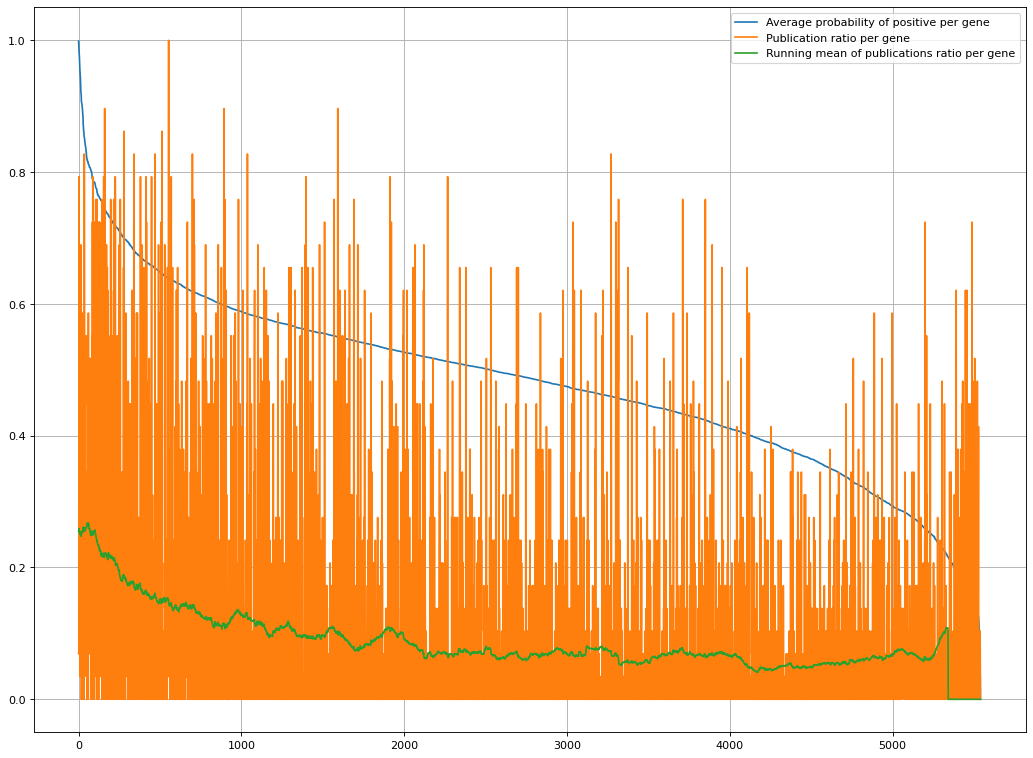

In [144]:
figure(figsize=(16, 12), dpi=80)
plt.plot(gene_index, avg_positive_prob_per_gene, label = 'Average probability of positive per gene')
plt.plot(gene_index, pub_ratio_per_gene, label = 'Publication ratio per gene')
plt.plot(gene_index, pub_ratio_per_gene_running_mean, label = 'Running mean of publications ratio per gene')
plt.legend()
plt.grid()
#plt.show()
plt.savefig("transcriptomics_proteomics_full_fata.png")

In [146]:
# read a not normalized network
import gcnIO

In [147]:
df_string_ppi = pd.read_csv("/home/samuele/EMOGI/artivir_data/data_preprocessing_pipeline/df_string_transcriptomics_proteomics.zip")

In [148]:
df_string_ppi.head()

,protein1,protein2,experimental,database,textmining,combined_score,gene_name_1,gene_name_2
0,9606.ENSP00000000233,9606.ENSP00000264718,157,0,0,156,ARF5,GPN1
1,9606.ENSP00000000233,9606.ENSP00000346046,178,0,0,177,ARF5,RPS17
2,9606.ENSP00000000233,9606.ENSP00000347134,143,0,63,162,ARF5,NET1
3,9606.ENSP00000000233,9606.ENSP00000354876,153,0,0,152,ARF5,MT-CO2
4,9606.ENSP00000000233,9606.ENSP00000381607,169,0,0,169,ARF5,GSTP1


In [147]:
#df_predictions_average.to_csv('df_predictions_average.zip', index=False, compression = dict(method='zip',archive_name='df_predictions_average.csv'))

In [148]:
#network, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, node_names, feat_names 

In [149]:
print(f"Percentage of links on the total: {(np.sum(network != 0)/np.sum(network == 0))*100}%")

Percentage of links on the total: 1.6892723376835652%


In [150]:
# Percentage of positives among the neighbours of positive labeled
np.shape(network)

(5541, 5541)

In [151]:
sum(y_labels)

317

In [152]:
positive_indices = np.where(np.array(y_labels) == 1)[0]

In [153]:
negative_indices = np.where(np.array(negative_set) == 1)[0]

In [179]:
edges_list_indices = np.where(np.array(network) != 0)

In [173]:
edges_list_indices

(array([   0,    0,    0, ..., 5540, 5540, 5540]),
 array([  64,  196,  232, ..., 5384, 5444, 5522]))

In [180]:
np.unique(edges_list_indices[0])

array([   0,    1,    2, ..., 5538, 5539, 5540])

In [157]:
np.where(edges_list_indices[0] == 3)[0]

array([485, 486, 487, 488, 489, 490, 491, 492])

# Check Homophily

In [252]:
# let's compute the homophily in the real network
percentage_of_positives_connected_positives = []
percentage_of_negatives_connected_positives = []
percentage_of_positives_connected_negatives = []
percentage_of_negatives_connected_negatives = []

# edges_list_indices[0] contains the indices of the hub nodes
for connected_gene_index in np.unique(edges_list_indices[0]):
    connections_to_check = np.where(edges_list_indices[0] == connected_gene_index)[0]
    if connected_gene_index in positive_indices:
        positive_connected_counter = 0
        negative_connected_counter = 0
        for connection in connections_to_check:
            # check the first neigbours for connected_gene_index positive
            if edges_list_indices[1][connection] in positive_indices:
                positive_connected_counter += 1
            elif edges_list_indices[1][connection] in negative_indices:
                negative_connected_counter += 1
        percentage_of_positives_connected_positives.append(positive_connected_counter/len(connections_to_check))        
        percentage_of_positives_connected_negatives.append(negative_connected_counter/len(connections_to_check))
        
    elif connected_gene_index in negative_indices:
        positive_connected_counter = 0
        negative_connected_counter = 0 
        for connection in connections_to_check:
            # check the first neigbours for connected_gene_index positive
            if edges_list_indices[1][connection] in positive_indices:
                positive_connected_counter += 1
            elif edges_list_indices[1][connection] in negative_indices:
                negative_connected_counter += 1
        percentage_of_negatives_connected_positives.append(positive_connected_counter/len(connections_to_check)) 
        percentage_of_negatives_connected_negatives.append(negative_connected_counter/len(connections_to_check))


In [253]:
np.mean(percentage_of_positives_connected_positives)

0.04004225935386663

In [254]:
np.mean(percentage_of_negatives_connected_positives)

0.04389106378918523

In [255]:
np.mean(percentage_of_positives_connected_negatives)

0.1488458712390661

In [256]:
np.mean(percentage_of_negatives_connected_negatives)

0.1606154100133852

In [257]:
confusion_matrix = [[np.mean(percentage_of_positives_connected_positives), np.mean(percentage_of_positives_connected_negatives)],[np.mean(percentage_of_negatives_connected_positives), np.mean(percentage_of_negatives_connected_negatives)]]
confusion_matrix

[[0.04004225935386663, 0.1488458712390661],
 [0.04389106378918523, 0.1606154100133852]]

In [258]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

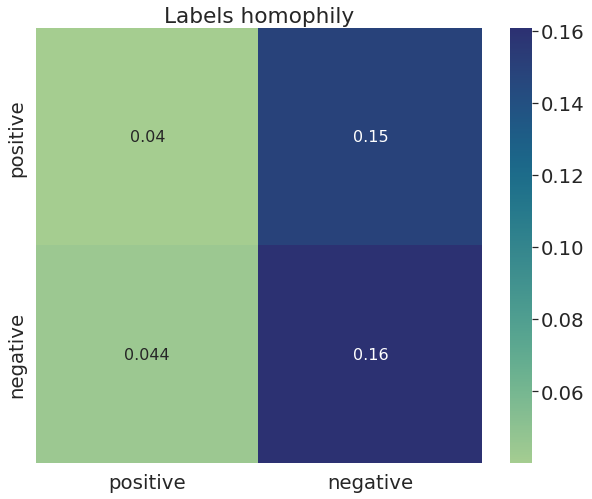

In [259]:
df_cm = pd.DataFrame(confusion_matrix, ["positive", "negative"], ["positive", "negative"])
sn.set(font_scale=1.8) # for label size
plt.figure(figsize=(10,8))
plt.title("Labels homophily")
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=sn.color_palette("crest", as_cmap=True)) # font size
#plt.show()
plt.savefig("homophily_transcriptomics_proteomics_missing_data.png")

In [260]:
# let's compute the homophily in the randomized network
np.random.shuffle(edges_list_indices[0])
np.random.shuffle(edges_list_indices[1])

percentage_of_positives_connected_positives_randomized = []
percentage_of_negatives_connected_positives_randomized = []
percentage_of_positives_connected_negatives_randomized = []
percentage_of_negatives_connected_negatives_randomized = []

# edges_list_indices[0] contains the indices of the hub nodes

for connected_gene_index in np.unique(edges_list_indices[0]):
    connections_to_check = np.where(edges_list_indices[0] == connected_gene_index)[0]
    if connected_gene_index in positive_indices:
        positive_connected_counter = 0
        negative_connected_counter = 0
        for connection in connections_to_check:
            # check the first neigbours for connected_gene_index positive
            if edges_list_indices[1][connection] in positive_indices:
                positive_connected_counter += 1
            elif edges_list_indices[1][connection] in negative_indices:
                negative_connected_counter += 1
        percentage_of_positives_connected_positives_randomized.append(positive_connected_counter/len(connections_to_check))        
        percentage_of_positives_connected_negatives_randomized.append(negative_connected_counter/len(connections_to_check))
        
    elif connected_gene_index in negative_indices:
        positive_connected_counter = 0
        negative_connected_counter = 0 
        for connection in connections_to_check:
            # check the first neigbours for connected_gene_index positive
            if edges_list_indices[1][connection] in positive_indices:
                positive_connected_counter += 1
            elif edges_list_indices[1][connection] in negative_indices:
                negative_connected_counter += 1
        percentage_of_negatives_connected_positives_randomized.append(positive_connected_counter/len(connections_to_check)) 
        percentage_of_negatives_connected_negatives_randomized.append(negative_connected_counter/len(connections_to_check))

In [261]:
np.mean(percentage_of_positives_connected_positives_randomized)

0.042978202588062356

In [262]:
np.mean(percentage_of_negatives_connected_positives_randomized)

0.04382485987758794

In [263]:
np.mean(percentage_of_positives_connected_negatives_randomized)

0.15452417910124136

In [264]:
np.mean(percentage_of_negatives_connected_negatives_randomized)

0.1558164036883142

In [265]:
confusion_matrix_random = [[np.mean(percentage_of_positives_connected_positives_randomized), np.mean(percentage_of_positives_connected_negatives_randomized)],[np.mean(percentage_of_negatives_connected_positives_randomized), np.mean(percentage_of_negatives_connected_negatives_randomized)]]

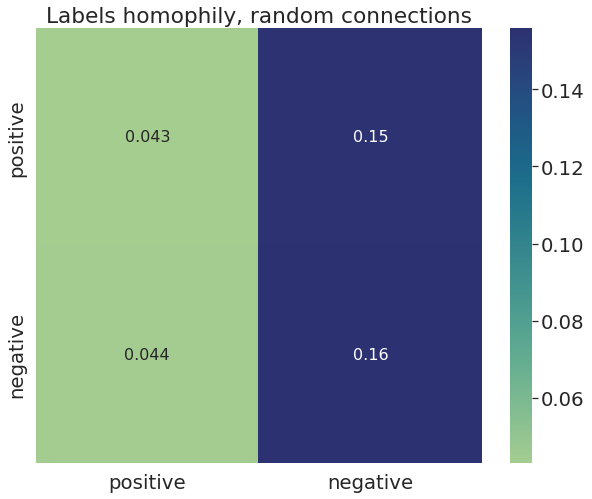

In [266]:
df_cm = pd.DataFrame(confusion_matrix_random, ["positive", "negative"], ["positive", "negative"])
sn.set(font_scale=1.8) # for label size
plt.figure(figsize=(10,8))
plt.title("Labels homophily, random connections")
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=sn.color_palette("crest", as_cmap=True)) # font size
#plt.show()
plt.savefig("homophily_transcriptomics_proteomics_missing_data_random.png")

# Check coreness of the positives Vs. the negatives

In [209]:
import networkx as nx

In [210]:
network_ones = network

In [211]:
for i in np.arange(np.shape(network)[0]):
    for j in np.arange(np.shape(network)[1]):
        if network_ones[i, j] != 0:
            network_ones[i, j] = 1

In [212]:
node_names = [ elem.decode("utf-8") for elem in node_names[:, 1]]

In [213]:
G = nx.from_pandas_adjacency(pd.DataFrame(network_ones, index=node_names, columns=node_names))

In [247]:
pos_indices = np.where(np.array(y_labels) == 1)[0]

In [259]:
pos_names = []
for index in pos_indices:
    pos_names.append(node_names[index])
len(pos_names)

317

In [256]:
neg_indices = np.where(np.array(negative_set) == 1)[0]

In [258]:
neg_names = []
for index in neg_indices:
    neg_names.append(node_names[index])
len(neg_names)

951

In [214]:
G.number_of_edges()

255018

In [215]:
G.number_of_nodes()

5541

In [216]:
G.nodes()

NodeView(('PLIN3', 'ZNF281', 'CTNNB1', 'RFT1', 'OAS1', 'VKORC1', 'RPS6KA5', 'FA2H', 'RPL23', 'CSTB', 'DTL', 'MTA1', 'SLC30A5', 'WDR82', 'CAV2', 'BMS1', 'CARM1', 'LGALS3BP', 'CEACAM6', 'POLD1', 'TDP2', 'SND1', 'UBAP1', 'ERICH5', 'BTBD11', 'FXR2', 'INF2', 'CIAO2B', 'GSTZ1', 'RPP25', 'IDH2', 'HNRNPUL1', 'LUC7L', 'GMNN', 'ABCE1', 'REPS1', 'FLYWCH1', 'DUS3L', 'PAPSS2', 'LRRC8C', 'MRPL11', 'DNASE1L1', 'CAPZA1', 'PUM2', 'NDUFV2', 'KDM1B', 'CBX3', 'SRSF7', 'AURKB', 'MAPK8', 'GCC2', 'SPATA33', 'GFM1', 'TMEM263', 'SLC25A24', 'NSFL1C', 'TMEM14C', 'RACK1', 'ISYNA1', 'PDHB', 'IPO13', 'ACYP2', 'MYL12A', 'WDR36', 'DSG2', 'FAM160B1', 'KRTCAP2', 'TTC27', 'CUL3', 'CTTNBP2NL', 'SEC61A2', 'CBR1', 'MBD2', 'PDLIM2', 'HACD3', 'SAP18', 'RANBP3', 'ZCCHC7', 'KDM5C', 'GCLM', 'ATP6V1C1', 'C17orf75', 'WRNIP1', 'DVL2', 'ARL6IP6', 'BAZ1B', 'PSMA1', 'CSNK1G2', 'IGSF8', 'ZNF579', 'AP1B1', 'RBM39', 'MAGT1', 'COQ8A', 'PARP1', 'GPX2', 'DHX38', 'EEF1E1', 'AKR1B1', 'EXD2', 'ASF1B', 'CENPH', 'PSMG3', 'GBA', 'NAE1', 'HNRNPD'

In [218]:
list(nx.k_shell(G, k = 111).nodes)

['HABP4', 'XRN2', 'CCDC124', 'TTC37', 'MTREX', 'GCN1']

In [ ]:
k_shell_dec = {}
for k in np.arange(112):
    k_shell_dec[k] = list(nx.k_shell(G, k = k).nodes)

In [225]:
k_shell_dec.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111])

In [260]:
positive_coreness_scores = []
for gene in pos_names:
    for key in k_shell_dec:
        if gene in k_shell_dec[key]:
            positive_coreness_scores.append(key)
            break
        

In [262]:
len(positive_coreness_scores)

316

In [270]:
np.mean(positive_coreness_scores)

37.31645569620253

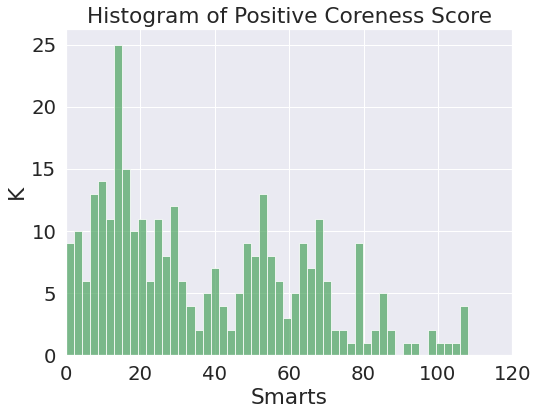

In [282]:
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(positive_coreness_scores, 50, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('K')
plt.title('Histogram of Positive Coreness Score')
plt.xlim(0, 120)
plt.grid(True)
plt.show()

In [263]:
negative_coreness_scores = []
for gene in neg_names:
    for key in k_shell_dec:
        if gene in k_shell_dec[key]:
            negative_coreness_scores.append(key)
            break

In [264]:
len(negative_coreness_scores)

937

In [271]:
np.mean(negative_coreness_scores)

43.184631803628605

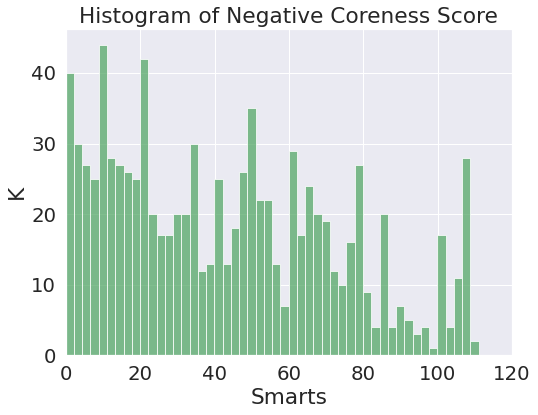

In [283]:
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(negative_coreness_scores, 50, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('K')
plt.title('Histogram of Negative Coreness Score')
plt.xlim(0, 120)
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import tensorflow as tf

/home/samuele/.pyenv/versions/3.6.10/envs/jupiter-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/samuele/.pyenv/versions/3.6.10/envs/jupiter-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/samuele/.pyenv/versions/3.6.10/envs/jupiter-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

In [7]:
fasta = "/home/samuele/courses/data.fasta"

In [35]:
map = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

count_positives = 0
count_total = 0
with open(fasta) as f:
    for line in f:
        if len(line.strip()) == 2:
            count_total += 1
            label = int(line.strip()[1])
            if label == 1:
                count_positives += 1
            sequence = f.readline().strip() # it reads the following line
            sequence = [map[base] for base in sequence]
            sequence = tf.one_hot(sequence, depth=4)
            #yield sequence, label
            

#print(count_positives)
#print(count_total)
    

10000
19403
